In [90]:
import numpy as np
import pandas as pd

from sklearn.preprocessing import scale
from sklearn.utils import shuffle

from sklearn.linear_model import LinearRegression

from sklearn.linear_model import Lasso, Ridge
from sklearn.linear_model import LassoCV

from matplotlib import pyplot as plt
%matplotlib inline

In [67]:
data = pd.read_csv("data/bikes_rent.csv")

In [68]:
data.head()

,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed(mph),windspeed(ms),cnt
0,1,0,1,0,6,0,2,14.110847,18.18125,80.5833,10.749882,4.805490,985
1,1,0,1,0,0,0,2,14.902598,17.68695,69.6087,16.652113,7.443949,801
2,1,0,1,0,1,1,1,8.050924,9.47025,43.7273,16.636703,7.437060,1349
3,1,0,1,0,2,1,1,8.200000,10.60610,59.0435,10.739832,4.800998,1562
4,1,0,1,0,3,1,1,9.305237,11.46350,43.6957,12.522300,5.597810,1600


In [69]:
data = data.dropna()

In [70]:
data.describe()

,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed(mph),windspeed(ms),cnt
count,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000
mean,2.496580,0.500684,6.519836,0.028728,2.997264,0.683995,1.395349,20.310776,23.717699,62.789406,12.762576,5.705220,4504.348837
std,1.110807,0.500342,3.451913,0.167155,2.004787,0.465233,0.544894,7.505091,8.148059,14.242910,5.192357,2.321125,1937.211452
min,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,2.424346,3.953480,0.000000,1.500244,0.670650,22.000000
25%,2.000000,0.000000,4.000000,0.000000,1.000000,0.000000,1.000000,13.820424,16.892125,52.000000,9.041650,4.041864,3152.000000
50%,3.000000,1.000000,7.000000,0.000000,3.000000,1.000000,1.000000,20.431653,24.336650,62.666700,12.125325,5.420351,4548.000000
75%,3.000000,1.000000,10.000000,0.000000,5.000000,1.000000,2.000000,26.872076,30.430100,73.020850,15.625371,6.984967,5956.000000
max,4.000000,1.000000,12.000000,1.000000,6.000000,1.000000,3.000000,35.328347,42.044800,97.250000,34.000021,15.198937,8714.000000


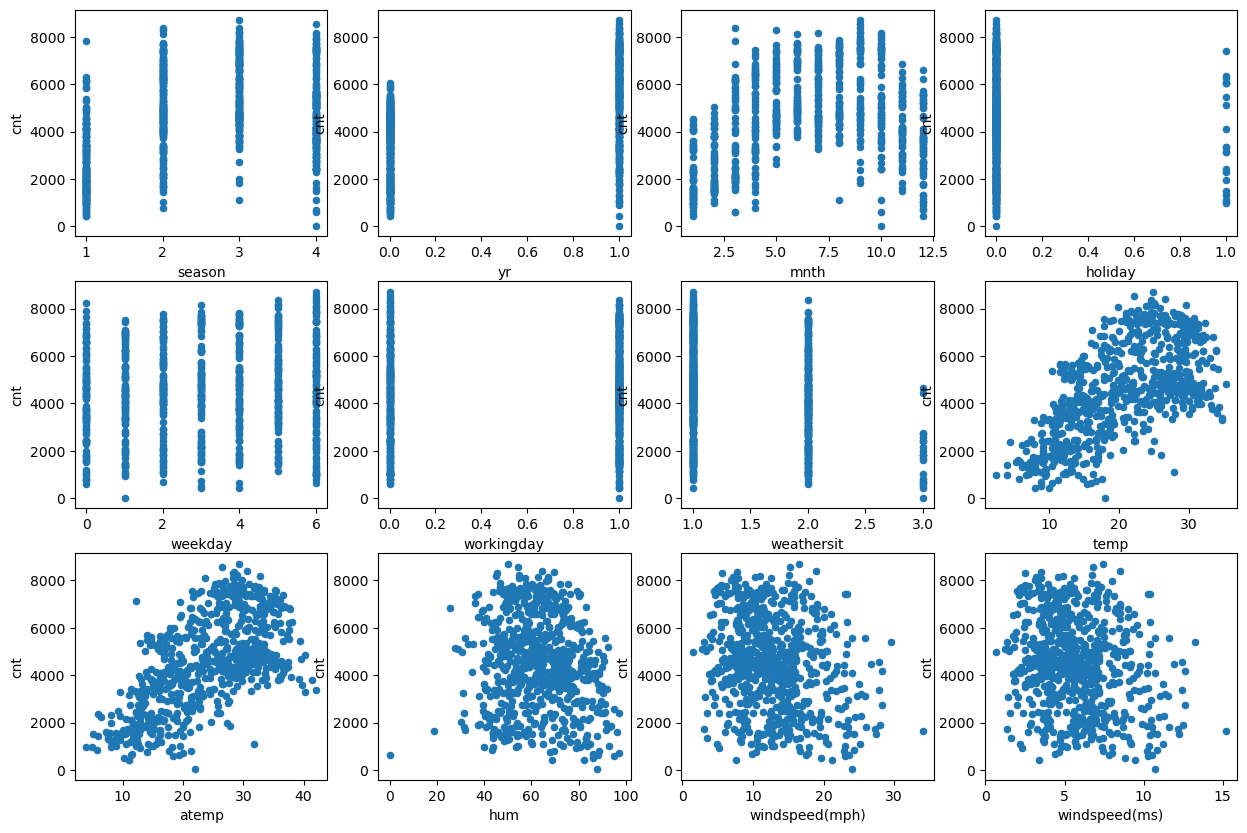

In [71]:
fig, axes = plt.subplots(nrows=3, ncols=4, figsize=(15, 10))

for idx, feature in enumerate(data.columns[:-1]):
    data.plot(feature, "cnt", subplots=True, kind="scatter", ax=axes[idx // 4, idx % 4])

In [72]:
data.corrwith

<bound method DataFrame.corrwith of      season  yr  mnth  holiday  weekday  workingday  weathersit       temp  \
0         1   0     1        0        6           0           2  14.110847   
1         1   0     1        0        0           0           2  14.902598   
2         1   0     1        0        1           1           1   8.050924   
3         1   0     1        0        2           1           1   8.200000   
4         1   0     1        0        3           1           1   9.305237   
..      ...  ..   ...      ...      ...         ...         ...        ...   
726       1   1    12        0        4           1           2  10.420847   
727       1   1    12        0        5           1           2  10.386653   
728       1   1    12        0        6           0           2  10.386653   
729       1   1    12        0        0           0           1  10.489153   
730       1   1    12        0        1           1           2   8.849153   

        atemp      hum  win

In [73]:
data.corr()

,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed(mph),windspeed(ms),cnt
season,1.000000,-0.001844,0.831440,-0.010537,-0.003080,0.012485,0.019211,0.334315,0.342876,0.205445,-0.229046,-0.229046,0.406100
yr,-0.001844,1.000000,-0.001792,0.007954,-0.005461,-0.002013,-0.048727,0.047604,0.046106,-0.110651,-0.011817,-0.011817,0.566710
mnth,0.831440,-0.001792,1.000000,0.019191,0.009509,-0.005901,0.043528,0.220205,0.227459,0.222204,-0.207502,-0.207502,0.279977
holiday,-0.010537,0.007954,0.019191,1.000000,-0.101960,-0.253023,-0.034627,-0.028556,-0.032507,-0.015937,0.006292,0.006292,-0.068348
weekday,-0.003080,-0.005461,0.009509,-0.101960,1.000000,0.035790,0.031087,-0.000170,-0.007537,-0.052232,0.014282,0.014282,0.067443
workingday,0.012485,-0.002013,-0.005901,-0.253023,0.035790,1.000000,0.061200,0.052660,0.052182,0.024327,-0.018796,-0.018796,0.061156
weathersit,0.019211,-0.048727,0.043528,-0.034627,0.031087,0.061200,1.000000,-0.120602,-0.121583,0.591045,0.039511,0.039511,-0.297391
temp,0.334315,0.047604,0.220205,-0.028556,-0.000170,0.052660,-0.120602,1.000000,0.991702,0.126963,-0.157944,-0.157944,0.627494
atemp,0.342876,0.046106,0.227459,-0.032507,-0.007537,0.052182,-0.121583,0.991702,1.000000,0.139988,-0.183643,-0.183643,0.631066
hum,0.205445,-0.110651,0.222204,-0.015937,-0.052232,0.024327,0.591045,0.126963,0.139988,1.000000,-0.248489,-0.248489,-0.100659


In [74]:
# means = data.mean(axis=0)

# means

In [75]:
# stds = data.std(axis=0)

# stds

In [76]:
# data = (data - means) / stds

# data[:3]

In [86]:
data_shuffled = shuffle(data, random_state=123)
X = scale(data_shuffled[data_shuffled.columns[:-1]])
y = data_shuffled["cnt"]

X.shapeape

(731, 12)

In [78]:
lr = LinearRegression().fit(X, y)

lr.coef_

array([ 5.70868358e+02,  1.02196445e+03, -1.41300271e+02, -8.67617506e+01,
        1.37229322e+02,  5.63902745e+01, -3.30232952e+02,  3.67443304e+02,
        5.85587973e+02, -1.45606190e+02,  1.24574328e+13, -1.24574328e+13])

In [79]:
ridge = Ridge().fit(X, y)

ridge.coef_

array([ 563.06457225, 1018.94837879, -131.87332028,  -86.746098  ,
        138.00511118,   55.90311038, -332.3497885 ,  386.45788919,
        566.34704706, -145.0713273 ,  -99.25944108,  -99.25944115])

In [80]:
lasso = Lasso().fit(X, y)

lasso.coef_

array([ 5.60241616e+02,  1.01946349e+03, -1.28730627e+02, -8.61527813e+01,
        1.37347894e+02,  5.52123706e+01, -3.32369857e+02,  3.76363236e+02,
        5.76530794e+02, -1.44129155e+02, -1.97139689e+02, -2.80396395e-08])

In [88]:
alphas = np.arange(1, 500, 50)
coefs_lasso = np.zeros((alphas.shape[0], X.shape[1]))
coefs_ridge = np.zeros((alphas.shape[0], X.shape[1]))

for i, alpha in enumerate(alphas):
    ridge = Ridge(alpha=alpha).fit(X, y)
    lasso = Lasso(alpha=alpha).fit(X, y)
    
    for j in range(X.shape[1]):
        coefs_ridge[i][j] = ridge.coef_[j]
        coefs_lasso[i][j] = lasso.coef_[j]

print(coefs_ridge)
print(coefs_lasso)

[[ 563.06457225 1018.94837879 -131.87332028  -86.746098    138.00511118
    55.90311038 -332.3497885   386.45788919  566.34704706 -145.0713273
   -99.25944108  -99.25944115]
 [ 461.1786324   954.30774189  -41.56545001  -84.91347027  126.60366663
    54.2516911  -313.27515141  458.90147709  481.44350031 -151.29101033
  -101.62731482 -101.62731483]
 [ 403.97653045  898.08362212    5.67424346  -81.91106159  117.94141144
    52.72848389 -298.40898086  455.28986839  467.43141748 -152.68605059
  -102.10167084 -102.10167084]
 [ 366.60423851  848.46346471   34.02728278  -78.77196479  110.68012006
    51.25719208 -286.12515935  447.47982533  455.75402966 -151.48320603
  -102.00537592 -102.00537593]
 [ 339.74528956  804.25104797   52.48987295  -75.71740756  104.40346414
    49.84189502 -275.48609488  438.50968939  444.7642744  -148.94396978
  -101.58638458 -101.58638458]
 [ 319.15864133  764.5614337    65.15200737  -72.81970821   98.87880449
    48.4845255  -266.00255564  429.21412336  434.23523

Text(0.5, 1.0, 'Ridge')

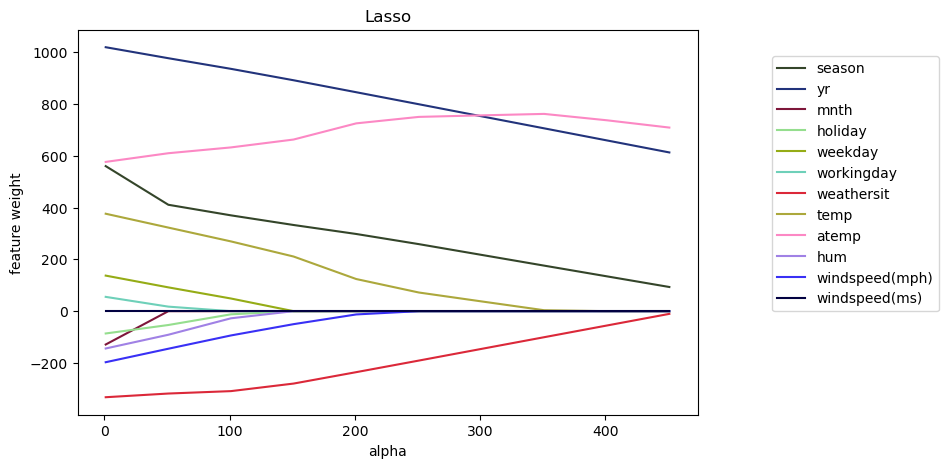

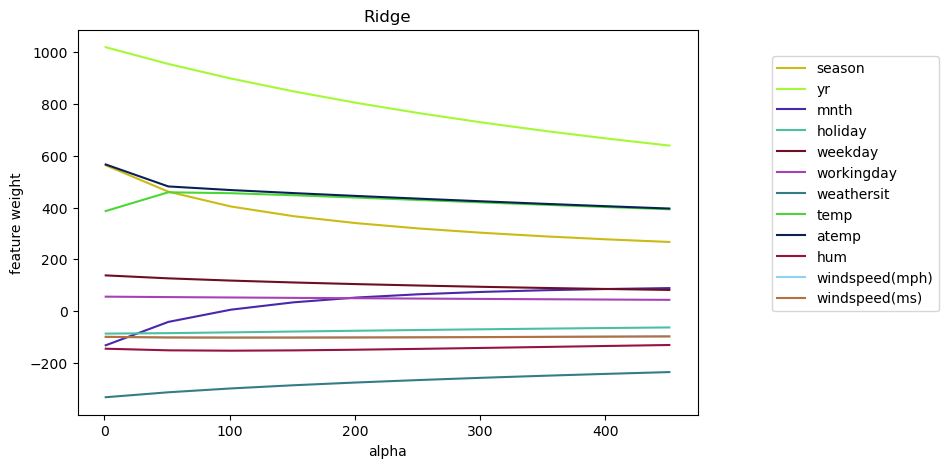

In [89]:
plt.figure(figsize=(8, 5))
for coef, feature in zip(coefs_lasso.T, data.columns):
    plt.plot(alphas, coef, label=feature, color=np.random.rand(3))
plt.legend(loc="upper right", bbox_to_anchor=(1.4, 0.95))
plt.xlabel("alpha")
plt.ylabel("feature weight")
plt.title("Lasso")

plt.figure(figsize=(8, 5))
for coef, feature in zip(coefs_ridge.T, data.columns):
    plt.plot(alphas, coef, label=feature, color=np.random.rand(3))
plt.legend(loc="upper right", bbox_to_anchor=(1.4, 0.95))
plt.xlabel("alpha")
plt.ylabel("feature weight")
plt.title("Ridge")

In [93]:
alphas = np.arange(1, 100, 5)

lasso_cv = LassoCV(alphas=alphas).fit(X, y)